# Seminar 2: Exploratory Data Analysis in Python

Pandas environment

* We will use the Ames Housing dataset of real estate sales
* The content is based on the Kaggle Competition House Prices Advanced Regression Techniques. See details [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).

### Goals for today:
* Read files (csv)
* Display needed parts of df
* Aggregate df
* Filter df

In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

C:\Users\Bryan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Task 1: Read data and understand it's structure

### 1a. Load training dataset 

- data in `99_files/house-prices-kaggle.zip`
- load train.csv
- and display 5 random rows

Hint: Use `.style` attribute to display all columns

Hint: See  `data_description.txt` for documentation of variables

In [4]:
import zipfile
import random

In [5]:
# Load the data
with zipfile.ZipFile('../99_files/house-prices-kaggle.zip') as z:
    print(z.namelist())
    with z.open("train.csv") as f:
        train = pd.read_csv(f, index_col=["Id"])
      

['train.csv', 'test.csv', 'sample_submission.csv', 'data_description.txt']


In [6]:
row_count = train.shape[0]
column_count = train.shape[1]
print(row_count)
print(column_count)

1460
80


In [7]:
for i in range(5):
    print(train.iloc[[random.randint(1,row_count)]])
    

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1399          50       RL         60.0     7200   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1399         Lvl    AllPub    Inside  ...        0    NaN  GdPrv         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1399       0      5    2009        WD         Normal     138000  

[1 rows x 80 columns]
      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1457          20       RL         85.0    13175   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                

In [29]:
train.info

<bound method DataFrame.info of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour U

In [48]:
# train.iloc[0,column_count-1] example for indexing at a certain column position

208500

### 1b. What is the distribution `SalePrice` variable?

* plot histogram (`.hist()` on `pd.Series`) with bin width $10,000

Hint: Specify bins using range

In [8]:
train.iloc[0:row_count, column_count - 1] # gathering all the rows for the selected column 

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

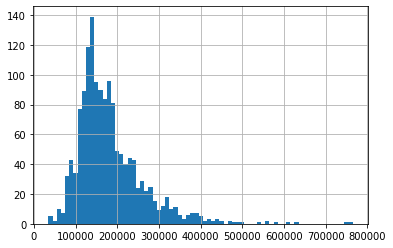

In [9]:
train.iloc[0:row_count, column_count - 1].hist(bins=np.arange(min(train.iloc[0:row_count, column_count - 1]), max(train.iloc[0:row_count, column_count - 1]) + 10000, 10000))

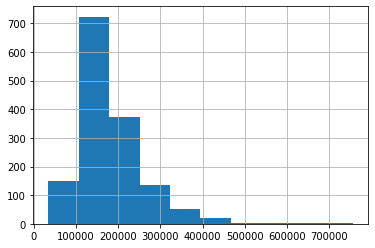

In [10]:
train.SalePrice.hist(bins=10)

### 1c. Split columns between quantitative and qualitative variables
Store column names in separate lists of strings `quantitative` and `qualitative`

Hint: `.dtypes` attribute contains a series with strings describing dtype of the data

In [13]:
train_types = train.dtypes

In [14]:
qual_list = np.array(object)
quant_list = np.array(object)
for i in range(column_count):
    if (train_types[i] == 'int64' or train_types[i] == 'float64'):
        quant_list = np.append(quant_list,[train.columns[i],"quantitative"])
    elif (train_types[i] == 'object'):
        qual_list = np.append(qual_list,[train.columns[i],"qualitative"])
print(qual_list)
print(quant_list)


[<class 'object'> 'MSZoning' 'qualitative' 'Street' 'qualitative' 'Alley'
 'qualitative' 'LotShape' 'qualitative' 'LandContour' 'qualitative'
 'Utilities' 'qualitative' 'LotConfig' 'qualitative' 'LandSlope'
 'qualitative' 'Neighborhood' 'qualitative' 'Condition1' 'qualitative'
 'Condition2' 'qualitative' 'BldgType' 'qualitative' 'HouseStyle'
 'qualitative' 'RoofStyle' 'qualitative' 'RoofMatl' 'qualitative'
 'Exterior1st' 'qualitative' 'Exterior2nd' 'qualitative' 'MasVnrType'
 'qualitative' 'ExterQual' 'qualitative' 'ExterCond' 'qualitative'
 'Foundation' 'qualitative' 'BsmtQual' 'qualitative' 'BsmtCond'
 'qualitative' 'BsmtExposure' 'qualitative' 'BsmtFinType1' 'qualitative'
 'BsmtFinType2' 'qualitative' 'Heating' 'qualitative' 'HeatingQC'
 'qualitative' 'CentralAir' 'qualitative' 'Electrical' 'qualitative'
 'KitchenQual' 'qualitative' 'Functional' 'qualitative' 'FireplaceQu'
 'qualitative' 'GarageType' 'qualitative' 'GarageFinish' 'qualitative'
 'GarageQual' 'qualitative' 'GarageCond'

### 1c* display df with only quantitative columns

In [15]:
#Get only quantitative column names
for i in range(len(quant_list)):
    if (i%2 != 0):
        print(quant_list[i])

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [19]:
# get df
quantitative = [column for column in train.columns if train.dtypes[column] != 'object']
qualitative = [column for column in train.columns if train.dtypes[column] == 'object']

print(quantitative)
print(qualitative)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual

In [20]:
# Display df
train[quantitative]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


### 1d. Are `dtype`s correct? 

* visually check whether all the columns look correctly parsed

In [17]:
for i in range(len(quant_list)):
    if (i%2 != 0):
        for j in range(len(train.columns)):
            if (train.columns[j] == quant_list[i]):
                print(train.loc[1, :quant_list[i]])
        
        

MSSubClass    60
Name: 1, dtype: object
MSSubClass       60
MSZoning         RL
LotFrontage    65.0
Name: 1, dtype: object
MSSubClass       60
MSZoning         RL
LotFrontage    65.0
LotArea        8450
Name: 1, dtype: object
MSSubClass           60
MSZoning             RL
LotFrontage        65.0
LotArea            8450
Street             Pave
Alley               NaN
LotShape            Reg
LandContour         Lvl
Utilities        AllPub
LotConfig        Inside
LandSlope           Gtl
Neighborhood    CollgCr
Condition1         Norm
Condition2         Norm
BldgType           1Fam
HouseStyle       2Story
OverallQual           7
Name: 1, dtype: object
MSSubClass           60
MSZoning             RL
LotFrontage        65.0
LotArea            8450
Street             Pave
Alley               NaN
LotShape            Reg
LandContour         Lvl
Utilities        AllPub
LotConfig        Inside
LandSlope           Gtl
Neighborhood    CollgCr
Condition1         Norm
Condition2         Norm
BldgTyp

In [154]:
# check a handful of columns and then compare

In [22]:
#In the dataframe train, select the qualitative ones, and select a sample of 5 random rows and check which columns they have
train[qualitative].sample(5).style

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
996,RL,Pave,nan,IR1,Lvl,AllPub,Inside,Mod,BrkSide,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,nan,Detchd,Unf,TA,TA,Y,nan,MnPrv,nan,WD,Abnorml
592,RL,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,Stone,Ex,TA,PConc,Ex,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,BuiltIn,RFn,TA,TA,Y,nan,nan,nan,ConLI,Normal
1161,RL,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,Gable,CompShg,Plywood,Brk Cmn,None,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,nan,nan,nan,WD,Normal
664,RL,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,Av,BLQ,Rec,GasA,TA,Y,SBrkr,TA,Typ,nan,Detchd,RFn,TA,TA,Y,nan,MnPrv,nan,WD,Normal
555,RL,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,RFn,TA,TA,Y,nan,nan,nan,WD,Normal


### 1e. Plot number of missing data for all columns

80


<BarContainer object of 80 artists>

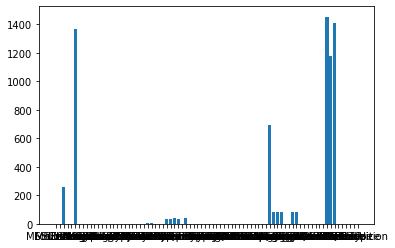

In [23]:
vect_sums = train.isnull().sum() #indexing <-----
print(len(vect_sums))
plt.bar(train.columns, train.isnull().sum())          

### For the better visiability drop columns with no missing data

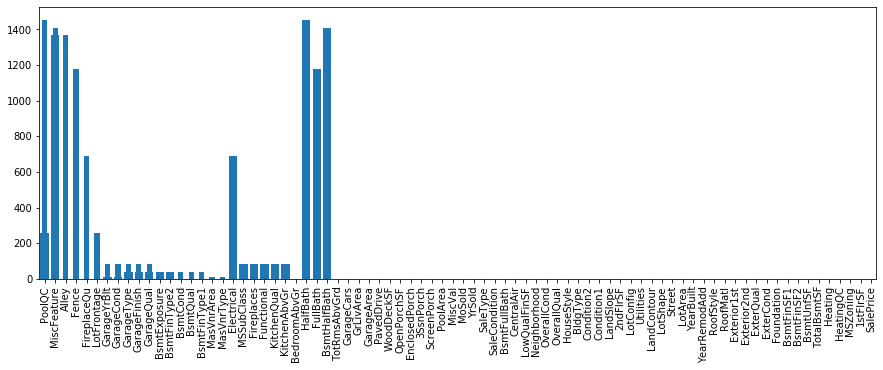

In [25]:
for i in range(len(train.columns)):
    if i < len(vect_sums):  # Check if index is within bounds
        if vect_sums[i] <= 0:  # Change the condition to drop if <= 0
            vect_sums.drop(vect_sums.index[i], inplace=True)
plt.bar(vect_sums.index, vect_sums)   

train.isna().sum().sort_values(ascending=False).plot.bar(figsize=(15, 5))

<BarContainer object of 19 artists>

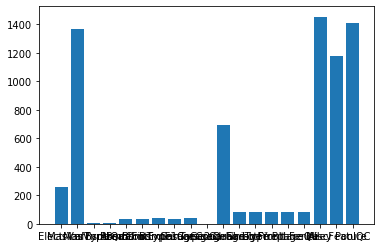

In [28]:
for i in range(len(train.columns)):
    if i < len(vect_sums):  # Check if index is within bounds
        if vect_sums[i] <= 0:  # Change the condition to drop if <= 0
            vect_sums.drop(vect_sums.index[i], inplace=True)
plt.bar(vect_sums.sort_values(ascending = True).index, vect_sums)

## Task 2: Aggregation

### 2.1 Calculate the average LotArea for each year (YrSold)

In [ ]:
# YrSold in parentheses, so we want to make that the index and group it according to YrSold

In [31]:
train.groupby('YrSold').first()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
YrSold,,,,,,,,,,,,,,,,,,,,,
2006,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,Ex,GdWo,Shed,0,2,WD,Abnorml,140000
2007,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,0,Ex,GdPrv,Shed,0,5,WD,Normal,181500
2008,60,RL,65.0,8450,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,Gd,GdWo,Shed,0,2,WD,Normal,208500
2009,50,RL,85.0,14115,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,0,None,MnPrv,Shed,700,10,WD,Normal,143000
2010,20,RL,60.0,11241,Pave,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,None,MnPrv,Shed,700,3,WD,Normal,149000


In [33]:
#in non-dataframe form
train.groupby('YrSold')['LotArea'].mean()

#in dataframe form
train.groupby('YrSold')[['LotArea']].mean()


,LotArea
YrSold,
2006,10489.458599
2007,10863.686930
2008,10587.687500
2009,10294.248521
2010,10220.645714


In [ ]:
# mean, min, max

In [37]:
train.groupby('YrSold').agg({"LotArea": ["mean", "min", "max"]})

LotArea              
                mean   min     max
YrSold                            
2006    10489.458599  1533   70761
2007    10863.686930  1890  159000
2008    10587.687500  1680  164660
2009    10294.248521  1300  215245
2010    10220.645714  1491   57200

### 2.2 Calculate the average SalePrice for each street (Street)

In [35]:
train.groupby('Street')[['SalePrice']].mean()

,SalePrice
Street,
Grvl,130190.500000
Pave,181130.538514


### 2.2 Calculate the average SalePrice for Grvl street (Street)

In [38]:
#Dataframe, access the dataframe with conditions of the street, and make that about the sale price mean
train[train['Street'] == 'Grvl']['SalePrice'].mean()

130190.5

### 2.3 Calculate the average SalePrice for Grvl street (Street) But! Take into account only flats which cost more than 300000

In [43]:
train_saleprice_greater = train[train['SalePrice'] > 300000]
train_saleprice_greater.groupby('Street')[['SalePrice']].mean()

,SalePrice
Street,
Pave,375946.26087


## Task 3 Filtering

### 3.1 How many flats cost less than 200000 and have a 'Normal' condition (column SaleCondition)

In [49]:
train_saleprice_less = train[train['SalePrice'] < 200000]
train_normal_cond = train_saleprice_less[train_saleprice_less['SaleCondition'] == 'Normal']
#shape or len() before the text (len(df[(df['SalePrice'] < 200000) & (df['SaleCondition'] == 'Normal')]))
train_normal_cond.shape[0]

872

### 3.2 How many flats cost less than 200000 or have a 'Normal' condition (column SaleCondition)

In [50]:
#reminder that the "or" condition uses one |
train[(train['SalePrice'] < 200000) | (train['SaleCondition'] == 'Normal')].shape[0]

1351

### 3.3 How many flats cost have more areas on the second floor(2ndFlrSF) then on the first one(1stFlrSF)?

In [51]:
train[(train['2ndFlrSF'] > train['1stFlrSF'])].shape[0]

135

### What is the average cost (in thousands) for such type of the flats?

In [52]:
train_2ndHigher = train[(train['2ndFlrSF'] > train['1stFlrSF'])]

In [55]:
train_2ndHigher['SalePrice'].mean() 

200493.6

# BONUSES

## Task 1: Study relationships between variables

### 1a. see correlation matrix

In [ ]:
fig=plt.subplots(1,1,figsize=(15,12))
sns.heatmap(df[quantitative].corr(),vmin=-1,cmap='coolwarm',annot=True,fmt='0.1f')

### 2b. Boxplots for categorical variables

In [ ]:
sns.boxplot(data=df,x='MSZoning',y='SalePrice')

## Task 2: ANOVA disparity estimations 

### One-way ANOVA 
* Question: Do sale prices differ across categories of certain feature?
* Test: Do price means across factors with a feature differ in their underlying distribution? 
* Are prices of houses with pool drawn from distribution with different mean than prices of house without a pool? 

* We will test this on all features and plot results

### 2a. Function for estimating ANOVA for one feature
* Your task is to complete a following snippet:


```python

 def anova_feature(qualitative_series, quantitative_series):
    '''
    Performs One-way ANOVA testing whether all levels of `qualitative` series are drawn from distributions with equal means

    Expects:
    - 'qualitative_series': Series with categorical data delienating indivudal groups
    - 'quantitative_series': Series with value data on which the distribution is tested
    
    Uses `scipy.stats.f_oneway` to deliver the test.

    Returns pd.Series with `statistic`, `p_value` and `disparity` measure. `statistic` and `p_value` are calculated by `scipy.stats.f_oneway`. Disparity is calculated as 1/log(p_value).
    '''
    samples =  {
        factor: quantitative_series.loc[qualitative_series.fillna('MISSING') == factor] for factor in qualitative_series.fillna('MISSING').unique()
    }

    anova_result =  stats.f_oneway(*samples.values())
    
    pass
```

In [57]:
def anova_feature(qualitative_series, quantitative_series):
    '''
    Performs One-way ANOVA testing whether `quantitative_series` across levels of `qualitative_series` are drawn from distributions with equal means

    Expects:
    - 'qualitative_series': Series with categorical data delienating indivudal groups
    - 'quantitative_series': Series with value data on which the distribution is tested
    

    Returns Series with test statistic, p-value
    '''
    samples =  {
        factor: quantitative_series.loc[qualitative_series.fillna('MISSING') == factor]for factor in qualitative_series.fillna('MISSING').unique()
    }

    statistic, pvalue =  stats.f_oneway(*samples.values())
    
    return pd.Series({
        'statistic':statistic,
        'p_value':pvalue,
        'disparity': math.log(1./pvalue)
    })

anova_feature(train.MasVnrType, train.SalePrice)

statistic    8.467220e+01
p_value      1.054025e-64
disparity    1.473128e+02
dtype: float64

### 2b. Generate dataframe with ANOVA test of all quantitative columns on `SalePrice` in the dataset

In [59]:
anova = pd.DataFrame({
    col: anova_feature(train[col],train.SalePrice) for col in qualitative
}).T
anova

,statistic,p_value,disparity
MSZoning,43.840282,8.817634e-35,78.413725
Street,2.459290,1.170486e-01,2.145166
Alley,15.176614,2.996380e-07,15.020691
LotShape,40.132852,6.447524e-25,55.700931
LandContour,12.850188,2.742217e-08,17.411914
Utilities,0.298804,5.847168e-01,0.536628
LotConfig,7.809954,3.163167e-06,12.663937
LandSlope,1.958817,1.413964e-01,1.956188
Neighborhood,71.784865,1.558600e-225,517.637858
Condition1,6.118017,8.904549e-08,16.234118


### 2c. Plot the disparity measure

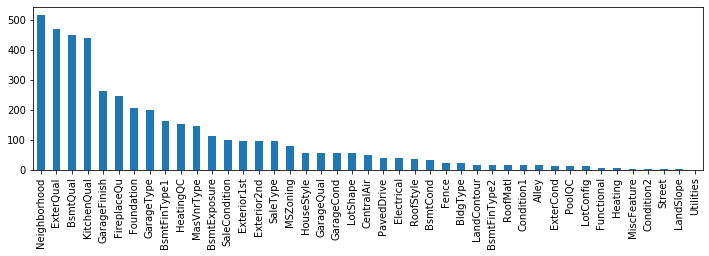

In [60]:
anova.disparity.sort_values(ascending=False).plot.bar(figsize=(12,3))

## Task 3: Encode qualitative variables as quantitative
### 3a. Feature-level function

* Write a function that  an input dataframe with encoded version
* Complete the following snippet

In [61]:
def encode_qualitative_feature(quantitative_series, qualitative_series, sorting_function=np.mean,suffix='_E'):
    '''
    Ranks `qualitative_series` according to sorting function applied on `quantitative_series` and return its rank as a series. 
    
    Series name is extended with `suffix`.
    '''
    encode_df = pd.DataFrame({
        quantitative_series.name:quantitative_series,
        qualitative_series.name:qualitative_series 
    })

    sorting = encode_df.groupby(qualitative_series.name)[quantitative_series.name].apply(np.mean).rank()

    return qualitative_series.map(sorting).rename(f'{qualitative_series.name}{suffix}')

In [62]:
encode_qualitative_feature(train.SalePrice, train.KitchenQual)

NameError: name 'df' is not defined

## 3b. Apply on all qualitative features


In [ ]:
def encode_columns(df, columns, sorting_function=np.mean,suffix='_E'):
    for col in columns:
        ranked_col = encode_qualitative_feature(df.SalePrice, df[col])
        df[ranked_col.name] = ranked_col

    return df

df_encoded =encode_columns(df.copy(), qualitative, sorting_function=np.mean,suffix='_E')
df_encoded